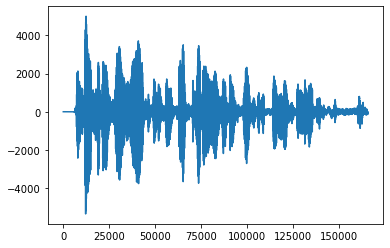

In [1]:
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
sr, x = wavfile.read('mono1.wav')
plt.plot(x)


In [2]:
#FILTER
wv = 1000.0 / (sr/2)

b, a = signal.butter(1, wv, 'lowpass')
filtedData = signal.filtfilt(b, a, x, padlen=1)

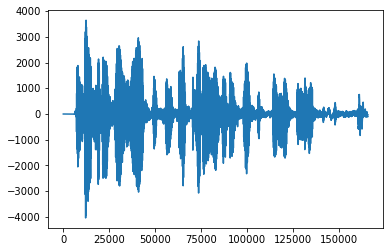

In [3]:
plt.plot(filtedData)
plt.show()
wavfile.write('filter.wav', sr, filtedData.astype(np.int16))

In [4]:
# REVERB
input_signal = np.array(x)
input_signal *= 2

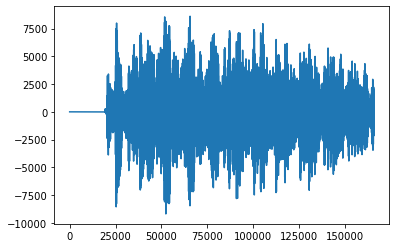

In [5]:
cycles = 10
delay = int(sr * (10.0 / 335))
multipl = 0.8
delay *= 10
output_signal = np.zeros(input_signal.size)
for i in range(0, cycles):
    rever = np.concatenate((np.zeros(delay*(i+1)), input_signal))[:input_signal.size]
    rever *= multipl
    output_signal += rever.astype(np.int16)
    multipl -= 0.1
plt.plot(output_signal)


In [6]:
wv = 1000.0 / (sr/2)
b, a = signal.butter(1, wv, 'lowpass')
output_filted = signal.filtfilt(b, a, output_signal, padlen=1)

input_signal += (output_signal * 0.25).astype(np.int16)

wavfile.write('reverb.wav', sr, input_signal.astype(np.int16))

In [7]:
#DISTORT
input_signal = np.array(x)

thresh = 2000
overthresh = 10000
y = []
for i in x:
    if abs(i) > thresh:
        if i > 0:
            y.append(overthresh)
        else:
            y.append(overthresh * -1)
    else:
        y.append(i)


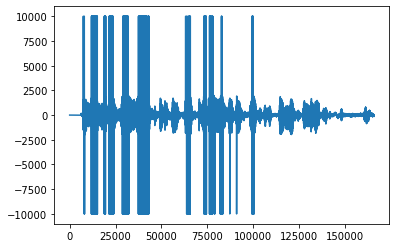

In [8]:
plt.plot(y)
plt.show()
outfile = np.array(y)
wavfile.write('distort.wav', sr, outfile.astype(np.int16))

